In [1]:
import os
import sys
import pickle

import warnings
warnings.simplefilter('ignore')


import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import roc_curve, roc_auc_score

%load_ext autoreload
%autoreload 2

In [2]:
from zedstat import zedstat

In [3]:
F = "TASK_PLOTS"
os.makedirs(F, exist_ok = True)

In [4]:
PLOTS_FOLDER = f"{F}/MAIN_PANELS"
os.makedirs(PLOTS_FOLDER, exist_ok = True)

## **------------------------------------------------**

In [19]:
from matplotlib.ticker import MaxNLocator
GLOBAL_FIGSIZE = 4
LABEL_SIZE = 13

GLOBAL_FONTSIZE = 22
plt.style.use('fivethirtyeight')

## **------------------------------------------------**

## **A. Disambiguation AUCs**

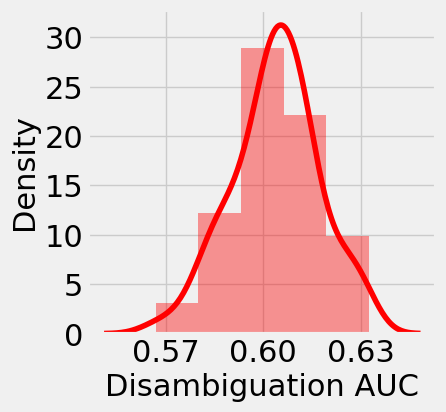

In [21]:
PERFORMANCE_DF = pd.read_csv(
    f"TASK_ASSETS/TASK4/CLF_AUCS.csv",
)

plt.figure(figsize = (GLOBAL_FIGSIZE, GLOBAL_FIGSIZE))
sns.distplot(
    PERFORMANCE_DF.auc, 
    bins = 5, color = "r",
    label = f"Disambiguation AUC",
    kde_kws={'linewidth': 4}
)

plt.xticks(fontsize=GLOBAL_FONTSIZE)
plt.yticks(fontsize=GLOBAL_FONTSIZE)

plt.xlabel("Disambiguation AUC", fontsize = GLOBAL_FONTSIZE)
plt.ylabel("Density", fontsize = GLOBAL_FONTSIZE)

plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=4))  # maximum 5 ticks on x-axis

plt.savefig(
    f"{PLOTS_FOLDER}/a_DISAMBIGUATION_AUCS.pdf",
    dpi = 300, bbox_inches = "tight", transparent=True
)
plt.show()

## **B. Number of coder per patient**

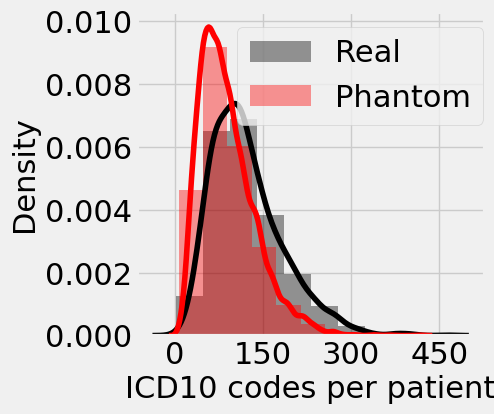

In [31]:
REAL_STATS = pd.read_csv(f"TASK_ASSETS/TASK4/REAL_PATIENT_CODE_STATS.csv")
TEOMIM_STATS = pd.read_csv(f"TASK_ASSETS/TASK4/TEOMIM_CODE_STATS.csv")

REAL_STATS = REAL_STATS[REAL_STATS.n_codes < 610]
TEOMIM_STATS = TEOMIM_STATS[TEOMIM_STATS.n_codes < 610]

plt.figure(figsize = (GLOBAL_FIGSIZE, GLOBAL_FIGSIZE))
sns.distplot(
    REAL_STATS['n_codes'], 
    color = "k", label = f"Real",
    kde_kws={'linewidth': 4},
    bins = 10
)
sns.distplot(
    TEOMIM_STATS['n_codes'], 
    color = "r", label = f"Phantom",
    kde_kws={'linewidth': 4},
    bins = 10
)

plt.legend(loc = "upper right", fontsize = GLOBAL_FONTSIZE, bbox_to_anchor=(1.04, 1))
plt.xlabel("ICD10 codes per patient", fontsize = GLOBAL_FONTSIZE)
plt.ylabel("Density", fontsize = GLOBAL_FONTSIZE)
#plt.title(f"Number of ICD10 codes per patient")

plt.xticks([0, 100, 200, 300, 400, 500], fontsize=GLOBAL_FONTSIZE)
plt.yticks(fontsize=GLOBAL_FONTSIZE)
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=4))  # maximum 5 ticks on x-axis

plt.savefig(
    f"{PLOTS_FOLDER}/b_N_CODES_HISTOGRAM.pdf",
    bbox_inches = "tight", dpi = 300, transparent=True
)

## **E. Correlation of Digital Twins to Validation Patients**

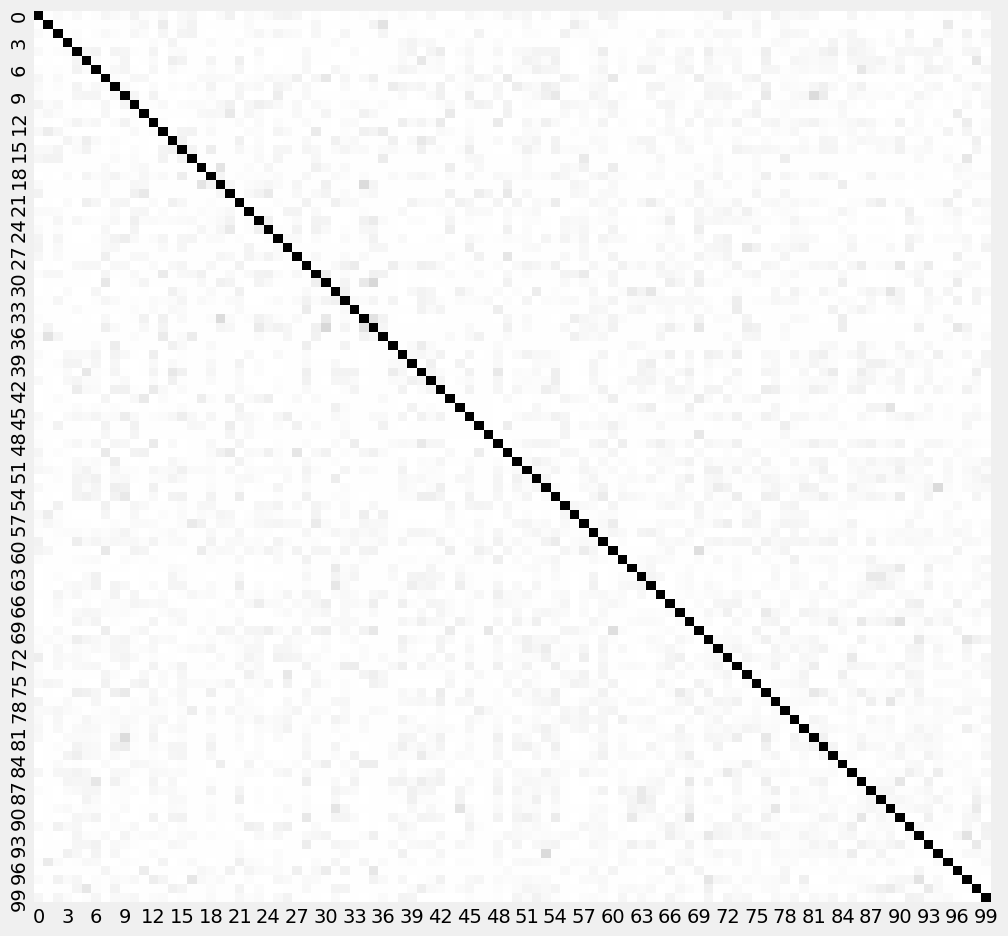

In [35]:
CORR_MATRIX_VALID = pickle.load( 
    open(f"TASK_ASSETS/TASK4/CM_VALIDATION.pkl", "rb")
)

plt.figure(figsize = (11,11)) 
with sns.plotting_context(font_scale=1.5):
    sns.heatmap(CORR_MATRIX_VALID, cmap="binary", cbar=False) # binary

#plt.title(f"{N_EACH} Digital Twins vs {N_EACH} Validation patients")

plt.savefig(
    f"{PLOTS_FOLDER}/e_CORRMATRIX_DTWINS_VALIDATIONS.png",
    dpi = 300, bbox_inches = "tight"
)
plt.show()

## **e. Barplots**

In [36]:
CONDITIONS = {
    'COPD': 'J44',
    'Pulmonary Hypertension': 'I27', # or see below
    "Obstructive Sleep Apnea": 'G47', # see G47.3
    "Lung Cancer": "C34",
    "Pulmonary Embolism": "I26",
    "GERD": "K21",
    "Heart Failure": "I50",
    "Ischemic Heart Disease": "I25", # or I20-I25
    "Diabetes Mellitus": "E10|E11",
    "Hyperlipidemia": "E78" # or see below
}
CONDITIONS_reversed = {
    value: key for key, value in CONDITIONS.items()
}

In [37]:
CODE_PREVALS

NameError: name 'CODE_PREVALS' is not defined

In [38]:
CODE_PREVALS = pd.read_csv(f"TASK_ASSETS/TASK4/CODE_PREVALENCE_STATS.csv")
CODE_PREVALS = CODE_PREVALS[
    CODE_PREVALS.code.isin(list(CONDITIONS.values()))
].rename(
    columns = {
        'preval_real': 'Real IPF Patients', 
        'preval_teomim': 'Digital Twins'
    }
)
CODE_PREVALS['code'] = [
    CONDITIONS_reversed[i] for i in CODE_PREVALS['code']
]

CODE_PREVALS_melted = CODE_PREVALS.melt(
    id_vars='code', 
    value_vars=['Real IPF Patients', 'Digital Twins'],
    var_name='Condition', value_name='Prevalence'
)

In [46]:
CODE_PREVALS_melted=CODE_PREVALS_melted.replace('Real IPF Patients','Real').replace('Digital Twins','Phantoms')

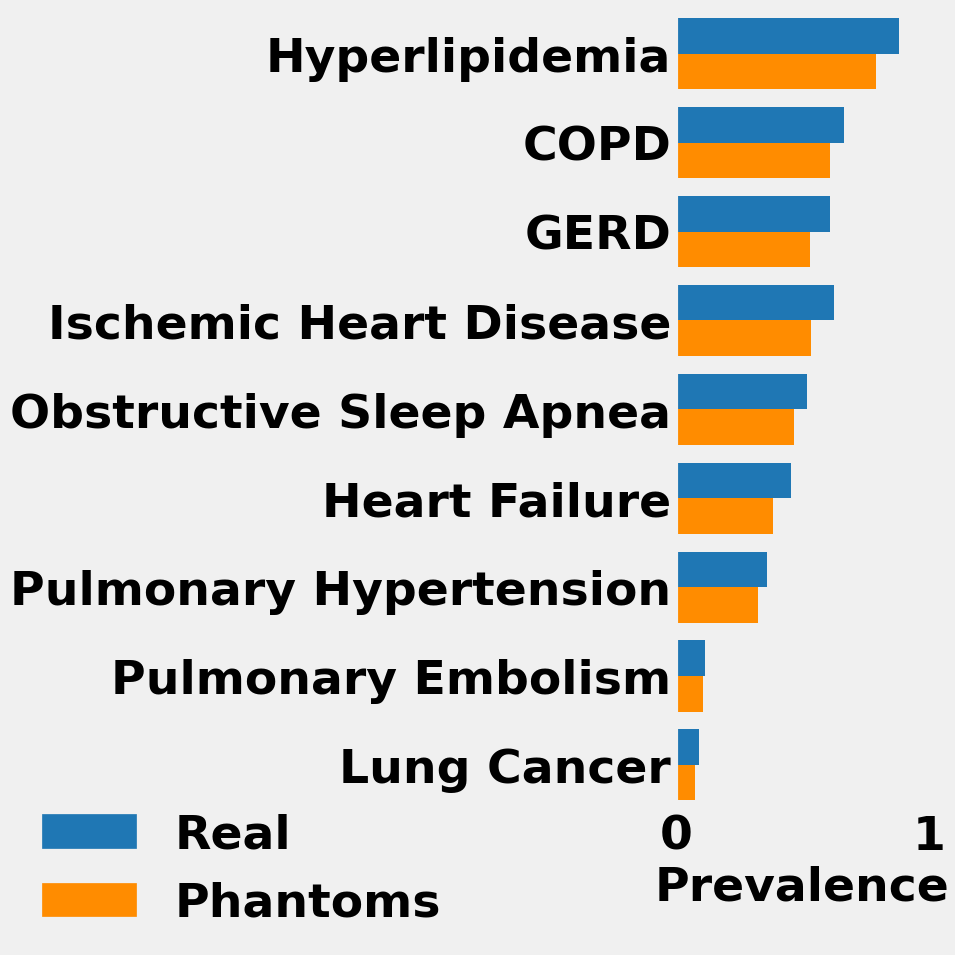

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib import rc_context

hue_colors = {
    "Literature": "tab:blue",
    
    "Phantom DB: National": "darkorange",
    "Phantom DB: African American": "red",
    
    "National": "darkorange",
    "African American": "red",
    
    'preval_real': 'blue',
    'preval_teomim': 'red',
    
    'Real': 'tab:blue',
    'Phantoms': 'darkorange'
}

# Set variable for label size
BARPLOT_LABELSIZE = 34
BARPLOT_FONTSIZE = 12  # New variable for legend and xtick fontsize


with rc_context({'font.weight': 'bold', 'axes.labelweight': 'bold', 'axes.titleweight': 'bold'}):
  

    # Create a figure with two subplots side by side
    fig, axs = plt.subplots(1, 1, figsize=(11, 10))

    # Plotting the first horizontal barplot using Seaborn
    sns.barplot(
        #x='preval', y='disease', hue='source', 
        y='code', x='Prevalence', hue='Condition',
        palette=hue_colors,
        data=CODE_PREVALS_melted, 
        saturation = 1,
        ax=axs,
        linewidth=25
    )

    # Set labels and title for the first subplot
    #axs.get_xlabel().remove()
    axs.set_xlabel('Prevalence', fontsize=BARPLOT_LABELSIZE)
    axs.set_ylabel('', fontsize=BARPLOT_LABELSIZE)
    axs.tick_params(axis='y', labelsize=BARPLOT_LABELSIZE)
    axs.tick_params(axis='x', labelsize=BARPLOT_LABELSIZE)


    axs.get_legend().remove()

    axs.set_xticks([0, 1])
    axs.set_xlim(0, 1) 
    
    
    for bar in axs.containers:
        for rect in bar.patches:
            #rect.set_edgecolor('black')  # Set edge color of the bar
            rect.set_linewidth(10.5)  # Set linewidth of the bar



    # Set explicit legend for the first subplot with rectangular patches
    legend_labels = ['Real', 'Phantoms']  # Specify legend labels
    legend_colors = [hue_colors[i] for i in legend_labels]  # Specify legend colors
    legend_patches = [Patch(color=color, label=label) for label, color in zip(legend_labels, legend_colors)]
    #fig.legend(handles=legend_patches, fontsize=BARPLOT_LABELSIZE, loc='lower left', facecolor='white', framealpha=0)

    fig.legend(handles=legend_patches, 
               fontsize=BARPLOT_LABELSIZE, 
               bbox_to_anchor=(-0.515, -0.0593), 
               loc='lower left', facecolor='white', framealpha=0)

    #plt.tight_layout(pad = 0.01)
    
    plt.subplots_adjust(
        left=0.1, right=0.33, 
        bottom=0.1, top=0.9, 
        wspace=0.2, hspace=0.2
    )

    # Show the plot    
    plt.savefig(
        f"{PLOTS_FOLDER}/f_TEOMIM_VALID_PREVALS.pdf",
        bbox_inches = "tight", dpi = 300
    )
    
    plt.show()

# **Task 1**

### **QDistances**

In [5]:
qdistances = pd.read_csv(f"{TASK_FOLDER}/QDISTANCES.csv")
qdistances.head(4)

,patient,MASKING_FRACTION,QSTEPS_PER_MASKED_COL,orig_to_masked,orig_to_restored,restored_masked_dist_ratio
0,0,0.35,100,0.002696,0.000174,0.064419
1,1,0.35,100,0.003078,0.000113,0.036850
2,2,0.35,100,0.003727,0.000229,0.061334
3,3,0.35,100,0.003159,0.000229,0.072345


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


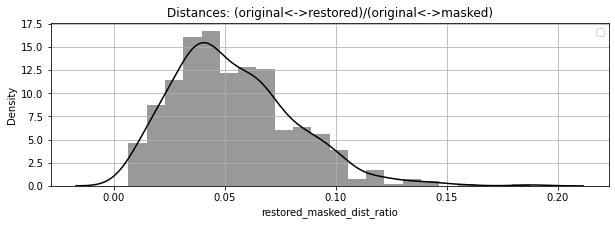

In [6]:
FIGSIZE = (10,3)

plt.figure(figsize = FIGSIZE)

sns.distplot(
    qdistances['restored_masked_dist_ratio'], 
    color = 'k'
)

plt.grid()
plt.legend()
plt.title(f"Distances: (original<->restored)/(original<->masked)")

plt.savefig(
    f"{TASK_PLOTS_FOLDER}/QDISTANCES.png", 
    bbox_inches = "tight", dpi = 300
)
plt.show()

### **Code prevalences in whole records**

In [7]:
CODE_PREVALS = pd.read_csv(
    f"{TASK_FOLDER}/CODE_PREVALENCES.csv"
)

In [8]:
CODE_PREVALS.sample(3)

,code,preval_original,preval_restored
292,C61,0.052,0.036
467,I24,0.016,0.010
226,I82,0.070,0.064


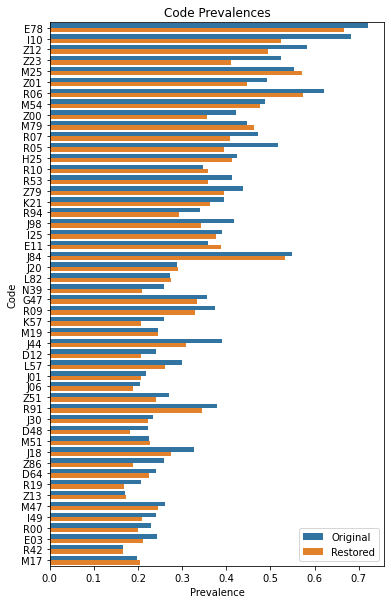

In [10]:
N_TOP_TO_PLOT = 50
FIGSIZE = (6,10)


plot_rename = {
    'preval_original': 'Original',
    'preval_restored': 'Restored'
}


df_melted = CODE_PREVALS.rename(columns = plot_rename).head(N_TOP_TO_PLOT).melt(
    id_vars='code', 
    value_vars=['Original', 'Restored'],
    var_name='Data source', value_name='Prevalence'
)

# Plot
plt.figure(figsize=FIGSIZE)
sns.barplot(data=df_melted, 
            y='code', x='Prevalence', 
            hue='Data source')

# Add labels and title
plt.ylabel('Code')
plt.xlabel('Prevalence')
plt.title(f'Code Prevalences')
plt.legend()

# Show the plot
plt.savefig(
    f"{TASK_PLOTS_FOLDER}/CODE_PREVALENCES.png", 
    bbox_inches = "tight", dpi = 300
)
plt.show()

# **Task 2**

In [11]:
TASK_FOLDER = "TASK_ASSETS/TASK2"
TASK_PLOTS_FOLDER = f"{F}/TASK2"
os.makedirs(TASK_PLOTS_FOLDER, exist_ok = True)

### **QDistances**

In [12]:
qdistances = pd.read_csv(f"{TASK_FOLDER}/QDISTANCES.csv")
qdistances.head(4)

,patient,QSTEPS_PER_MASKED_COL,orig_to_masked,orig_to_restored,restored_masked_dist_ratio
0,0,100,0.002591,0.000094,0.036099
1,1,100,0.003087,0.000172,0.055740
2,2,100,0.002505,0.000098,0.038961
3,3,100,0.003466,0.000370,0.106723


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


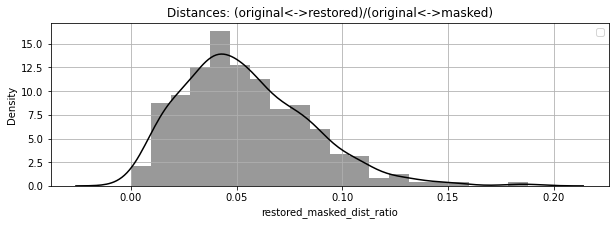

In [13]:
FIGSIZE = (10,3)

plt.figure(figsize = FIGSIZE)

sns.distplot(
    qdistances['restored_masked_dist_ratio'], 
    color = 'k'
)

plt.grid()
plt.legend()
plt.title(f"Distances: (original<->restored)/(original<->masked)")

plt.savefig(
    f"{TASK_PLOTS_FOLDER}/QDISTANCES.png", 
    bbox_inches = "tight", dpi = 300
)
plt.show()

### **Code prevalences in whole records**

In [14]:
CODE_PREVALS = pd.read_csv(
    f"{TASK_FOLDER}/CODE_PREVALENCES.csv"
)

In [15]:
CODE_PREVALS.sample(3)

,code,preval_original,preval_restored
468,S02,0.014,0.010
328,I69,0.042,0.032
74,R51,0.182,0.158


In [16]:
df_melted = CODE_PREVALS.head(N_TOP_TO_PLOT).melt(
    id_vars='code', 
    value_vars=['preval_original', 'preval_restored'],
    var_name='Condition', value_name='Prevalence'
)
df_melted

,code,Condition,Prevalence
0,E78,preval_original,0.712
1,I10,preval_original,0.658
2,Z12,preval_original,0.592
3,Z23,preval_original,0.542
4,M25,preval_original,0.584
...,...,...,...
95,I49,preval_restored,0.218
96,R00,preval_restored,0.154
97,E03,preval_restored,0.186
98,R42,preval_restored,0.256


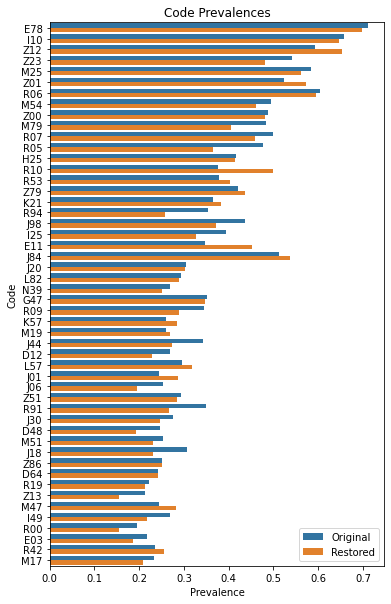

In [17]:
N_TOP_TO_PLOT = 50
FIGSIZE = (6,10)


plot_rename = {
    'preval_original': 'Original',
    'preval_restored': 'Restored'
}


df_melted = CODE_PREVALS.rename(columns = plot_rename).head(N_TOP_TO_PLOT).melt(
    id_vars='code', 
    value_vars=['Original', 'Restored'],
    var_name='Data source', value_name='Prevalence'
)

# Plot
plt.figure(figsize=FIGSIZE)
sns.barplot(data=df_melted, 
            y='code', x='Prevalence', 
            hue='Data source')

# Add labels and title
plt.ylabel('Code')
plt.xlabel('Prevalence')
plt.title(f'Code Prevalences')
plt.legend()

# Show the plot
plt.savefig(
    f"{TASK_PLOTS_FOLDER}/CODE_PREVALENCES.png", 
    bbox_inches = "tight", dpi = 300
)
plt.show()

# **Task 3**

In [18]:
TASK_FOLDER = "TASK_ASSETS/TASK3"
TASK_PLOTS_FOLDER = f"{F}/TASK3"
os.makedirs(TASK_PLOTS_FOLDER, exist_ok = True)

In [19]:
with open(
    f"{TASK_FOLDER}/BASE_CURVES.pkl", 
    "rb") as f:
    CURVES = pickle.load(f)

CURVE_CONCATENATION = pd.concat([
    CURVE[['fpr', 'tpr', 'threshold']] for CURVE in CURVES.values()
])

CURVE_CONCATENATION = pd.concat([CURVE[['fpr', 'tpr', 'threshold']] for CURVE in CURVES.values()])

## **Curves**

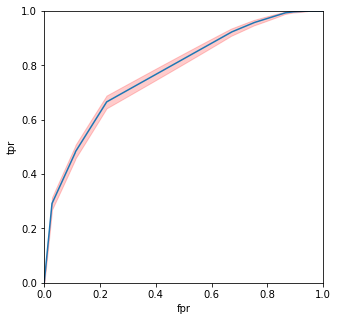

AUC:
(0.7769543393782383, 0.792938521242865, 0.7609701575136116)


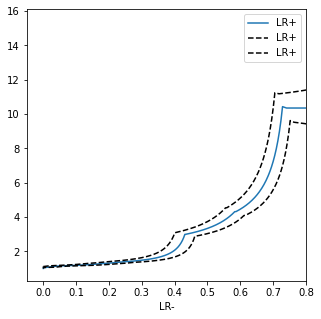

In [20]:
PATIENT_NUMBERS = {
    "total": 1580,
    "positive": 1544
}

zt=zedstat.processRoc(
    df = CURVE_CONCATENATION,
    order=3,
    total_samples = PATIENT_NUMBERS['total'],
    positive_samples = PATIENT_NUMBERS['positive'],
    alpha=0.05,
    prevalence = 0.75
)

zt.smooth(STEP=0.001)
zt.allmeasures(interpolate=True)
zt.usample(precision=3)
zt.getBounds()

plt.figure(figsize=[5,5])
ax=plt.gca()
ax=zt.get().tpr.plot(ax=ax)
plt.fill_between(x=zt.get().index, y1=zt.df_lim['U'].tpr,y2=zt.df_lim['L'].tpr, color='r',alpha=.2)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_ylabel('tpr')
plt.savefig(
    f"{TASK_PLOTS_FOLDER}/ROC.png",
    bbox_inches = "tight", dpi = 300
)
plt.show()

print("AUC:")
print(zt.auc())

zf=zt.get()
zfu=zt.df_lim['U']
zfl=zt.df_lim['L']
plt.figure(figsize=[5,5])
ax=plt.gca()
ax=(0.5*(zfu+zfl)).plot(
    ax=ax,
    x='LR-',
    y='LR+'
)
zfu.plot(ax=ax,x='LR-',y='LR+',style='--k')
zfl.plot(ax=ax,x='LR-',y='LR+',style='--k')
ax.set_xlim(None, 0.8)
plt.savefig(
    f"{TASK_PLOTS_FOLDER}/LR.png",
    bbox_inches = "tight", dpi = 300
)
plt.show()

# **Task 4**

In [5]:
TASK_FOLDER = "TASK_ASSETS/TASK4"
TASK_PLOTS_FOLDER = f"{F}/TASK4"
os.makedirs(TASK_PLOTS_FOLDER, exist_ok = True)

## **N code stats**

n_codes


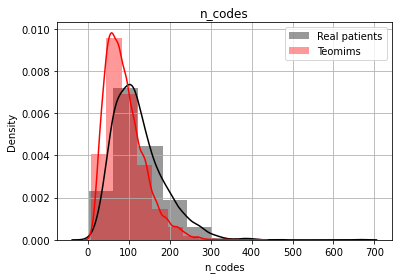

min_age


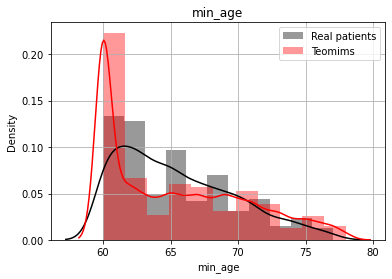

max_age


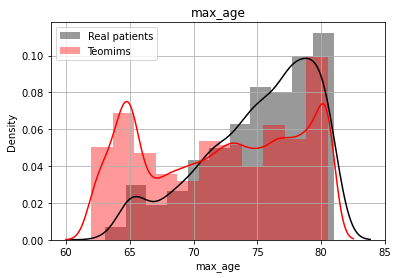

age_span


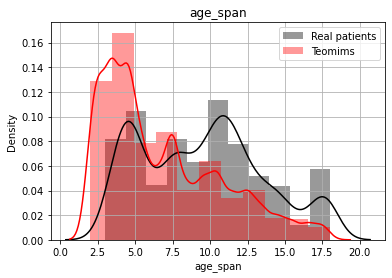

codes_yearly_density


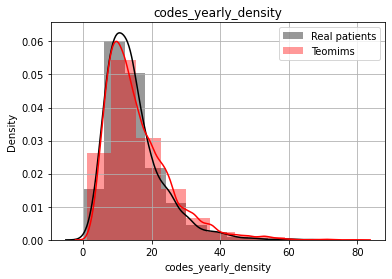

In [22]:
REAL_STATS = pd.read_csv(f"{TASK_FOLDER}/REAL_PATIENT_CODE_STATS.csv")
TEOMIM_STATS = pd.read_csv(f"{TASK_FOLDER}/TEOMIM_CODE_STATS.csv")

FIGSIZE = (6,4)
for col in list(TEOMIM_STATS.columns):
    print(col)
    
    plt.figure(figsize = FIGSIZE)
    
    sns.distplot(REAL_STATS[col], 
                 label = f"Real patients",
                 bins = 11,
                 color = 'k')
    
    sns.distplot(TEOMIM_STATS[col], 
                 label = f"Teomims",
                 bins = 11,
                 color = 'r')
    
    plt.title(f"{col}")
    plt.grid()
    plt.legend()
    plt.title(col)
    plt.savefig(
        f"{TASK_PLOTS_FOLDER}/distributions_{col}.png",
        dpi = 300, bbox_inches = "tight"
    )
    plt.show()

## **Code Prevalences**

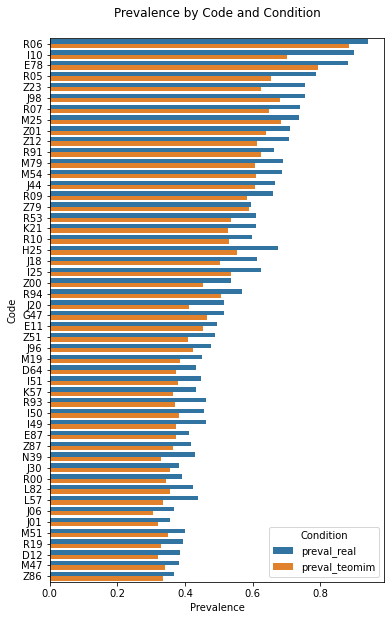

In [23]:
CODE_PREVALS = pd.read_csv(f"{TASK_FOLDER}/CODE_PREVALENCE_STATS.csv")

# Melt the DataFrame for seaborn
N_TOP_CODES = 50
df = CODE_PREVALS.head(N_TOP_CODES)

df_melted = CODE_PREVALS.head(N_TOP_CODES).melt(
    id_vars='code', 
    value_vars=['preval_real', 'preval_teomim'],
    var_name='Condition', value_name='Prevalence'
)

# Plot
plt.figure(figsize=(6,10))
sns.barplot(data=df_melted, y='code', x='Prevalence', hue='Condition')

# Add labels and title
plt.ylabel('Code')
plt.xlabel('Prevalence')
plt.title('Prevalence by Code and Condition\n')
plt.legend(title='Condition')
# Show the plot
plt.savefig(
    f"{TASK_PLOTS_FOLDER}/code_prevalences.png",
    dpi = 300, bbox_inches = "tight"
)
plt.show()

## **Correlations in qnet data**

In [24]:
N_EACH = 50

In [25]:
CORR_MATRIX_TRAINING = pickle.load( 
    open(f"{TASK_FOLDER}/CM_TRAINING.pkl", "rb")
)

CORR_MATRIX_VALID = pickle.load( 
    open(f"{TASK_FOLDER}/CM_VALIDATION.pkl", "rb")
)

CORR_MATRIX_SAME_SEED = pickle.load(
    open(f"{TASK_FOLDER}/CM_SAME_SEED.pkl", "rb")
)

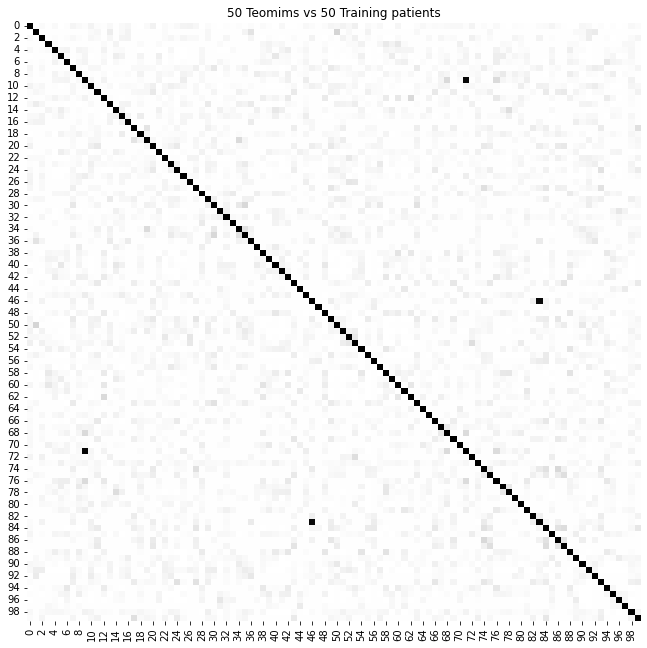

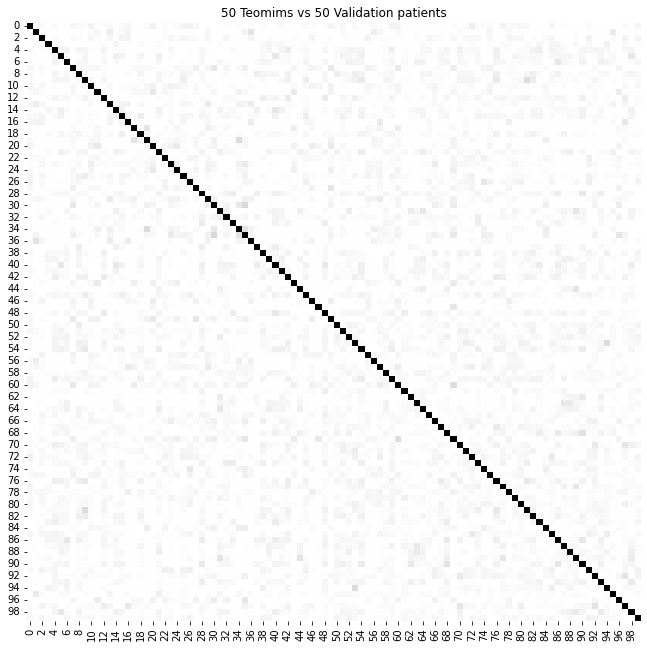

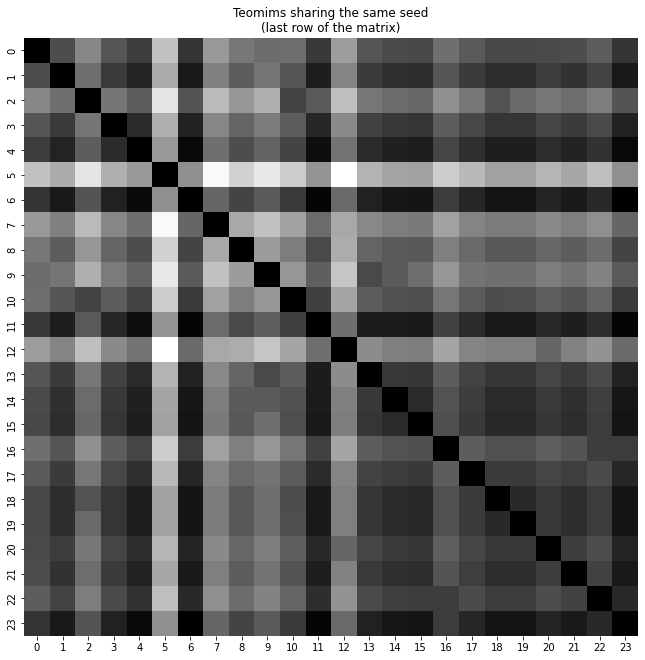

In [26]:
plt.figure(figsize = (11,11)) 
with sns.plotting_context(font_scale=1.5):
    sns.heatmap(CORR_MATRIX_TRAINING, cmap="binary", cbar=False) # 

plt.title(f"{N_EACH} Teomims vs {N_EACH} Training patients")

plt.savefig(
    f"{TASK_PLOTS_FOLDER}/CORR_teomims_training.png",
    dpi = 300, bbox_inches = "tight"
)
plt.show()


plt.figure(figsize = (11,11)) 
with sns.plotting_context(font_scale=1.5):
    sns.heatmap(CORR_MATRIX_VALID, cmap="binary", cbar=False) # binary

plt.title(f"{N_EACH} Teomims vs {N_EACH} Validation patients")

plt.savefig(
    f"{TASK_PLOTS_FOLDER}/CORR_teomims_validation.png",
    dpi = 300, bbox_inches = "tight"
)
plt.show()


plt.figure(figsize = (11,11))
with sns.plotting_context(font_scale=1.5):
    sns.heatmap(CORR_MATRIX_SAME_SEED, cmap="binary", cbar=False) # binary

plt.title(f"Teomims sharing the same seed\n(last row of the matrix)")
plt.savefig(
    f"{TASK_PLOTS_FOLDER}/CORR_multiple_teomims_from_same_original.png",
    dpi = 300, bbox_inches = "tight"
)
plt.show()

## **AUCs for distinguishability runs**

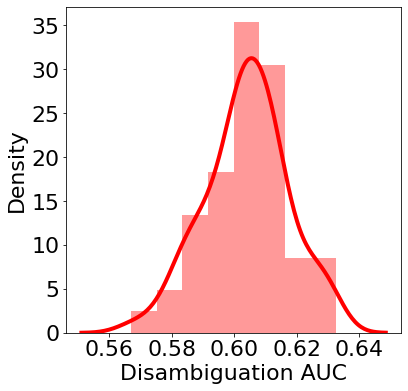